# Keras classifiers

## Importing libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten
from keras.layers.convolutional import Conv2D
from keras.datasets import fashion_mnist
from keras.losses import categorical_crossentropy
import numpy as np
from random import shuffle
import pickle, os, cv2
from time import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Neural network for symbols

### Creating the netwok

In [43]:
L = pickle.load(open("categories.sav", "rb"))
n_cat = len(L)

model = Sequential()
model.add(Conv2D(1, strides=(1, 1), activation='relu', kernel_size=(3,3), input_shape=(20,20,1), data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dense(400, activation='relu'))
model.add(Conv2D(200, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(350, activation='relu'))
model.add(Dense(n_cat, activation='softmax'))

### Compiling

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Importing data

In [45]:
dataset = np.loadtxt("data.csv", delimiter=",").astype(int)
X, Y = dataset[:,1:], dataset[:,0]
n, m = dataset.shape
labels = []
images = []
for i in range(n):
    l = [0]*n_cat
    l[Y[i]] = 1
    labels.append(l)
    images.append(255-X[i].reshape(20,20))

n = len(images)

combination = list(zip(images,labels))
shuffle(combination)

images, labels = zip(*combination)

images = np.array(images)
images = images.reshape(images.shape[0],20,20,1)
labels = np.array(labels)
#labels = labels.reshape((labels.shape[1], labels.shape[0]))
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [46]:
print(labels.shape)
print(images.shape)

(3073, 10)
(3073, 20, 20, 1)


### Splitting training and testing sets

In [47]:
train_number = n * 80 // 100
images_train, images_test, labels_train, labels_test = images[:train_number,:,:,:], images[train_number:,:,:,:], labels[:train_number], labels[train_number:]

In [48]:
print(labels_train.shape)

(2458, 10)


### Training

In [49]:
history = model.fit(images_train, labels_train, epochs=8)

Epoch 1/8
2458/2458 [==============================] - 11s 5ms/step - loss: 1.5325 - acc: 0.5777
Epoch 2/8
2458/2458 [==============================] - 11s 4ms/step - loss: 0.8705 - acc: 0.7116
Epoch 3/8
2458/2458 [==============================] - 11s 5ms/step - loss: 0.6301 - acc: 0.7832
Epoch 4/8
2458/2458 [==============================] - 11s 5ms/step - loss: 0.4610 - acc: 0.8519
Epoch 5/8
2458/2458 [==============================] - 11s 5ms/step - loss: 0.3147 - acc: 0.8987
Epoch 6/8
2458/2458 [==============================] - 11s 5ms/step - loss: 0.2263 - acc: 0.9345
Epoch 7/8
2458/2458 [==============================] - 11s 5ms/step - loss: 0.2017 - acc: 0.9361
Epoch 8/8
2458/2458 [==============================] - 11s 5ms/step - loss: 0.1458 - acc: 0.9561


### Testing

In [50]:
loss_and_metrics = model.evaluate(images_test, labels_test)

615/615 [==============================] - 1s 1ms/step


In [51]:
print(loss_and_metrics)

[0.42888938697372997, 0.9008130081300812]


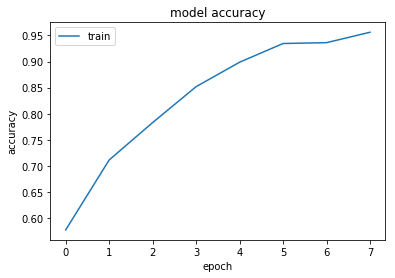

In [74]:
fig = plt.figure()
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
figname = "Evolution of accuracy with epochs.png"
fig.savefig(figname)
plt.show()

### Saving the model 

In [53]:
modelname = "symbol_classifier.sav"
pickle.dump(model, open(modelname, "wb"))

## Neural network for clefs

### Creating the network

In [69]:
clefs = pickle.load(open("clefs.sav", "rb"))
n_clefs = len(clefs)

clef_model = Sequential()
clef_model.add(Conv2D(1, strides=(1, 1), activation='relu', kernel_size=(3,3), input_shape=(20,20,1), data_format="channels_last"))
clef_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
clef_model.add(Dense(300, activation='relu'))
#clef_model.add(Conv2D(200, (5, 5), activation='relu'))
#clef_model.add(MaxPooling2D(pool_size=(2, 2)))
clef_model.add(Flatten())
clef_model.add(Dense(400, activation='relu'))
clef_model.add(Dense(n_clefs, activation='softmax'))

### Compiling 

In [70]:
clef_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Loading data

In [60]:
clefs_set = np.loadtxt("clefsfiles.csv", delimiter=",").astype(int)
X, Y = clefs_set[:,1:], clefs_set[:,0]
n, m = clefs_set.shape
cleftypes = []
symbols = []
for i in range(n):
    l = [0]*n_clefs
    l[Y[i]] = 1
    cleftypes.append(l)
    symbols.append(255-X[i].reshape(20,20))

n = len(symbols)

combination = list(zip(symbols,cleftypes))
shuffle(combination)

symbols, cleftypes = zip(*combination)

symbols = np.array(symbols)
symbols = symbols.reshape(symbols.shape[0],20,20,1)
cleftypes = np.array(cleftypes)

### Splitting train and test 

In [61]:
train_number = n * 80 // 100
symbols_train, symbols_test, cleftypes_train, cleftypes_test = symbols[:train_number,:,:,:], symbols[train_number:,:,:,:], cleftypes[:train_number], cleftypes[train_number:]

### Training 

In [71]:
clef_history = clef_model.fit(symbols_train, cleftypes_train, epochs=8)

Epoch 1/8
525/525 [==============================] - 3s 5ms/step - loss: 3.1434 - acc: 0.7771
Epoch 2/8
525/525 [==============================] - 2s 3ms/step - loss: 0.9210 - acc: 0.9429
Epoch 3/8
525/525 [==============================] - 2s 3ms/step - loss: 0.3991 - acc: 0.9752
Epoch 4/8
525/525 [==============================] - 2s 4ms/step - loss: 0.4298 - acc: 0.9733
Epoch 5/8
525/525 [==============================] - 2s 3ms/step - loss: 0.4298 - acc: 0.9733
Epoch 6/8
525/525 [==============================] - 2s 3ms/step - loss: 0.4298 - acc: 0.9733
Epoch 7/8
525/525 [==============================] - 2s 3ms/step - loss: 0.4298 - acc: 0.9733
Epoch 8/8
525/525 [==============================] - 2s 3ms/step - loss: 0.4298 - acc: 0.9733


### Testing 

In [72]:
results = clef_model.evaluate(symbols_test, cleftypes_test)
print(results)

132/132 [==============================] - 0s 2ms/step
[0.47141250335808954, 0.9696969696969697]


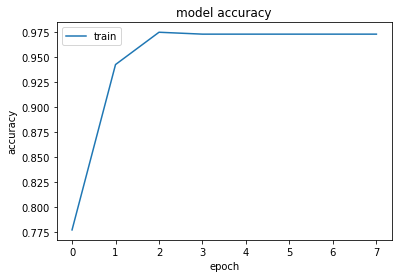

In [75]:
fig2 = plt.figure()
plt.plot(clef_history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
figname = "Evolution of accuracy on clefs with epochs.png"
fig2.savefig(figname)
plt.show()

### Saving the model 

In [76]:
clefmodelname = "clefmodel.sav"
pickle.dump(clef_model, open(clefmodelname, "wb"))